In [117]:
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [82]:
pwd = os.getcwd()
pwd

'/Users/phog/Desktop/cleverThings/_compDataAnalysis/assignment/case2'

In [22]:
def load_csv_data(folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    return pd.read_csv(file_path)

def load_excel_data(folder_path, file_name):
    file_path = f"{folder_path}/{file_name}"
    return pd.read_excel(file_path)

In [74]:
def combine_data(data_path):
    combined_data = []
    
    for day_folder in sorted(os.listdir(data_path)):
        day_path = os.path.join(data_path, day_folder)
        if not os.path.isdir(day_path):
            continue
            
        if day_folder == "D1_3":
            for d1_3_subfolder in sorted(os.listdir(day_path)):
                d1_3_subfolder_path = os.path.join(day_path, d1_3_subfolder)
                if not os.path.isdir(d1_3_subfolder_path):
                    continue
                
                for id_folder in sorted(os.listdir(d1_3_subfolder_path)):
                    process_id_folder(d1_3_subfolder_path, id_folder, combined_data)
        else:
            for id_folder in sorted(os.listdir(day_path)):
                process_id_folder(day_path, id_folder, combined_data)
                
    return combined_data

def process_id_folder(day_path, id_folder, combined_data):
    id_path = os.path.join(day_path, id_folder)
    if not os.path.isdir(id_path):
        return

    for round_folder in sorted(os.listdir(id_path)):
        round_path = os.path.join(id_path, round_folder)
        if not os.path.isdir(round_path):
            continue

        for phase_folder in sorted(os.listdir(round_path)):
            phase_path = os.path.join(round_path, phase_folder)
            if not os.path.isdir(phase_path):
                continue

            #print(f"Processing: {phase_path}")

            bvp_data = load_csv_data(phase_path, "BVP.csv")
            eda_data = load_csv_data(phase_path, "EDA.csv")
            hr_data = load_csv_data(phase_path, "HR.csv")
            temp_data = load_csv_data(phase_path, "TEMP.csv")
            response_data = load_csv_data(phase_path, "response.csv")

            combined_data.append({
                'day': day_path.split('/')[-1],
                'id': id_path.split('/')[-1],
                'round': round_path.split('/')[-1],
                'phase': phase_path.split('/')[-1],
                'bvp': bvp_data,
                'eda': eda_data,
                'hr': hr_data,
                'temp': temp_data,
                'response': response_data
            })

data_path = os.path.join(pwd, 'dataset')
combined_data = combine_data(data_path)

In [95]:
# Assuming combined_data is the list generated by the combine_data function
combined_dataframe = pd.DataFrame.from_records(combined_data)
combined_dataframe.head()

,day,id,round,phase,bvp,eda,hr,temp,response
0,D1_1,ID_1,round_1,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
1,D1_1,ID_1,round_1,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
2,D1_1,ID_1,round_1,phase3,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
3,D1_1,ID_1,round_2,phase1,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...
4,D1_1,ID_1,round_2,phase2,Unnamed: 0 BVP ...,Unnamed: 0 EDA ...,Unnamed: 0 HR time 0 ...,Unnamed: 0 TEMP ti...,Unnamed: 0 particpant_ID puzzler team_ID...


In [113]:
combined_dataframe.columns

Index(['day', 'id', 'round', 'phase', 'bvp', 'eda', 'hr', 'temp', 'response'], dtype='object')

In [104]:
# Example on how to grab specific instance
combined_dataframe.iloc[0,4].shape

(28624, 3)

>### Explore the DataSet

In [101]:
combined_dataframe.iloc[1,4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25081 entries, 0 to 25080
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25081 non-null  int64  
 1   BVP         25081 non-null  float64
 2   time        25081 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 588.0+ KB


>### Preproces the data

In [ ]:
def scale_nested_data(data, scaler):
    # Create a new empty DataFrame with the same columns as the input data
    scaled_data = pd.DataFrame(columns=data.columns)

    for index, row in data.iterrows():
        # Scale the numerical data in each nested structure and store it in the new DataFrame
        for col in data.columns:
            if isinstance(row[col], pd.DataFrame):
                scaled_data.at[index, col] = pd.DataFrame(scaler.fit_transform(row[col]), columns=row[col].columns)
            else:
                # If the data is not a nested DataFrame, just copy the original value
                scaled_data.at[index, col] = row[col]

    return scaled_data

# Instantiate a StandardScaler
scaler = StandardScaler()

# Scale the nested numerical data in the combined_dataframe
scaled_dataframe = scale_nested_data(combined_dataframe, scaler)

>### EDA

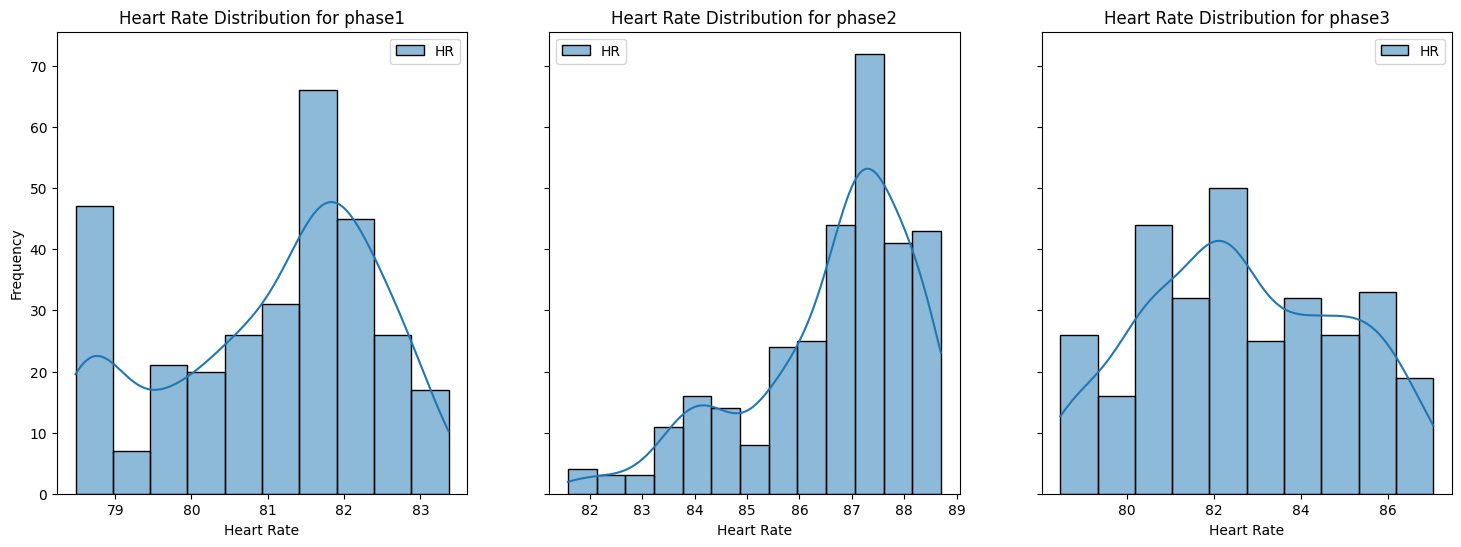

In [105]:
# Visualize the distribution of heart rate (HR) data for each phase
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for idx, phase in enumerate(['phase1', 'phase2', 'phase3']):
    phase_data = combined_dataframe[combined_dataframe['phase'] == phase]
    hr_data = [row['HR'] for row in phase_data['hr']]
    sns.histplot(hr_data, kde=True, ax=axs[idx])
    axs[idx].set_title(f"Heart Rate Distribution for {phase}")
    axs[idx].set_xlabel("Heart Rate")
    axs[idx].set_ylabel("Frequency")

plt.show()

In [115]:
measures = ['bvp', 'eda', 'hr', 'temp']
mean_correlations = {}

for phase in ['phase1', 'phase2', 'phase3']:
    phase_data = combined_dataframe[combined_dataframe['phase'] == phase]
    
    for measure1 in measures:
        for measure2 in measures:
            if measure1 == measure2:
                continue
            
            pair_key = f"{measure1}-{measure2}"
            if pair_key in mean_correlations:
                continue
            
            reverse_pair_key = f"{measure2}-{measure1}"
            correlations = []
            
            for index, row in phase_data.iterrows():
                data1 = row[measure1][measure1.upper()]
                data2 = row[measure2][measure2.upper()]

                # Resample the data1 to match the data2 length
                data1_resampled = np.interp(np.linspace(0, len(data1), len(data2)), np.arange(len(data1)), data1)

                # Calculate the correlation coefficient
                corr = np.corrcoef(data1_resampled, data2)[0, 1]
                correlations.append(corr)
                
            mean_correlations[pair_key] = np.mean(correlations)
            print(f"Mean correlation between {measure1.upper()} and {measure2.upper()} for {phase}: {mean_correlations[pair_key]}")

Mean correlation between BVP and EDA for phase1: -0.0008858134922426717
Mean correlation between BVP and HR for phase1: -0.008691716501399384
Mean correlation between BVP and TEMP for phase1: -0.0005541186658849621
Mean correlation between EDA and BVP for phase1: -0.0009637519201198928
Mean correlation between EDA and HR for phase1: 0.08862593815134094
Mean correlation between EDA and TEMP for phase1: 0.05398841109464238
Mean correlation between HR and BVP for phase1: -0.00037938138040186835
Mean correlation between HR and EDA for phase1: 0.08670907361518577
Mean correlation between HR and TEMP for phase1: 0.03585634596632165
Mean correlation between TEMP and BVP for phase1: -0.0005375750718088056
Mean correlation between TEMP and EDA for phase1: 0.05379912945810016
Mean correlation between TEMP and HR for phase1: 0.035757253906850105


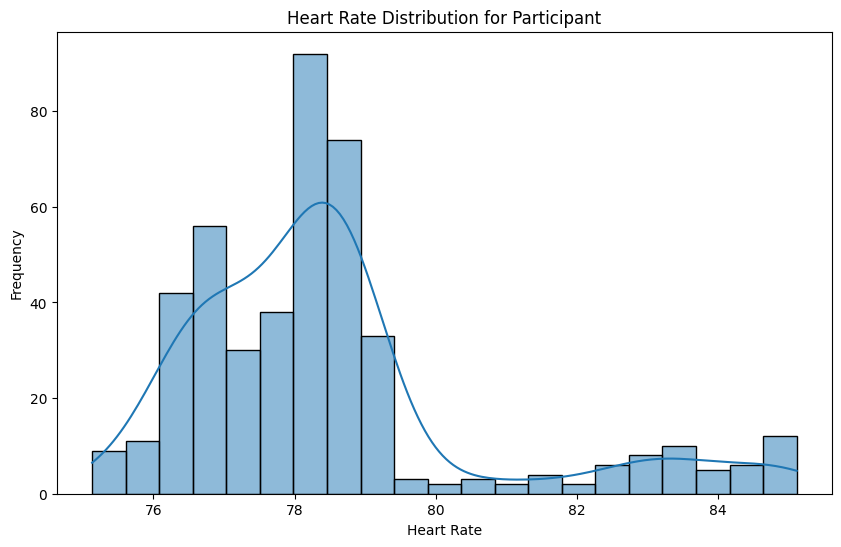

In [116]:
# Example: Visualize the distribution of heart rate (HR) data for a participant
plt.figure(figsize=(10, 6))
sns.histplot(combined_data[0]['hr']['HR'], kde=True)
plt.title("Heart Rate Distribution for Participant")
plt.xlabel("Heart Rate")
plt.ylabel("Frequency")
plt.show()